# Predicting Fluid Torque on Vertical Axis Wind Turbines

## The Problem

Vertical Axis Wind Turbines (VAWTs) can suffer mechanical damage if they do not break before reaching peak generator power. Breaking these turbines too far in advance, however, leads to lower power output. It is therefore important to predict the fluid torque that may cause a turbine to reach this state before it happens.


## The Data

## The Conclusions

## The Approach

TauF = ddTheta*I-ThetaC


I = .0085 kg*m^2

All units are SI

Data was recorded at 1000 Hz

dTheta and ddTheta use future info. Extension: make past info only versions

In [15]:
#load packages
import pandas as pd
from pandas.io.json import json_normalize
import json
import os

import seaborn as sns

#set seaborn style
sns.set(style="whitegrid", palette="colorblind", color_codes=True, context='talk')

%matplotlib inline

#add needed trig functions
from math import sin

In [16]:
cwd = os.getcwd()
data_dir = cwd + '/raw_data/high_turbulence'
os.listdir(data_dir)

['pointData.mat',
 'pointData copy 8.mat',
 'run_09.txt',
 'pointData copy.mat',
 'run_08.txt',
 'pointData copy 6.mat',
 'run_05.txt',
 'run_04.txt',
 'pointData copy 7.mat',
 'pointData copy 5.mat',
 'run_06.txt',
 'run_07.txt',
 'pointData copy 4.mat',
 'run_03.txt',
 'run_02.txt',
 'pointData copy 3.mat',
 'run_01.txt',
 'pointData copy 2.mat']

In [17]:
def load_all_runs(directory, max_run):
    for i in range(1,max_run+1):
        with open(data_dir + '/run_0'+str(i)+'.txt') as json_data:
            data = json.load(json_data)
        df = pd.DataFrame.from_dict(data, orient = 'index')
        df = df.transpose()
        df['run']=i
        if i == 1:
            df_all = df
        else:
            df_all = pd.concat([df_all,df],axis=0,ignore_index=True)
    return df_all

In [48]:
df_all = load_all_runs(data_dir,9)

In [49]:
df_all.head()

,torque,theta,dtheta,ddtheta,power,u,uInds,run
0,0.154538,4.688990,16.394420,23.968450,2.533564,0.685006,1.0,1
1,0.125633,4.705385,16.406404,23.968450,2.061193,0.677085,1.0,1
2,0.053472,4.721803,16.438362,47.936900,0.878988,0.681375,1.0,1
3,0.061200,4.738269,16.497998,46.224867,1.009681,0.640711,1.0,1
4,0.136655,4.754808,16.543537,40.881252,2.260764,0.671847,1.0,1


In [50]:
df_all.isna().sum()

torque          0
theta           0
dtheta          0
ddtheta         0
power           0
u          167212
uInds      167212
run             0
dtype: int64

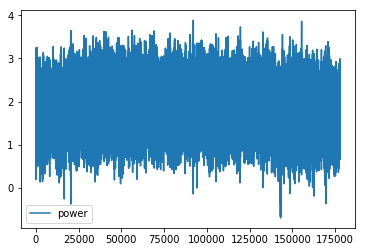

In [21]:
df_all.plot(y='power')

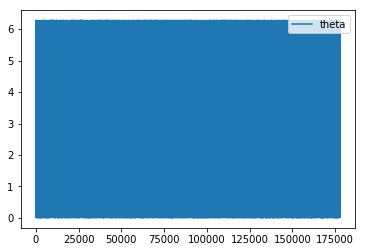

In [18]:
df_all.plot(y='theta')

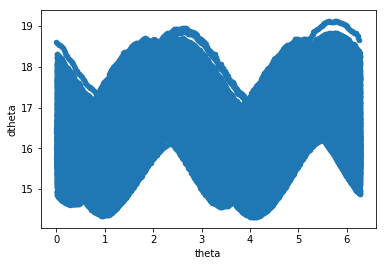

In [19]:
df_all.plot(x='theta',y='dtheta',kind='scatter')

TauF = ddTheta*I-ThetaC


I = .0085 kg*m^2

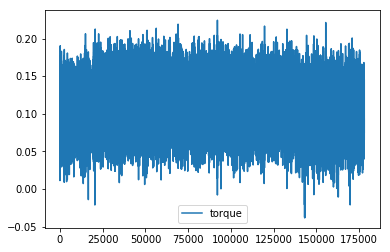

In [22]:
df_all.plot(y='torque')

In [23]:
df_all['torque_mean']=df['torque'].rolling(1000).mean()

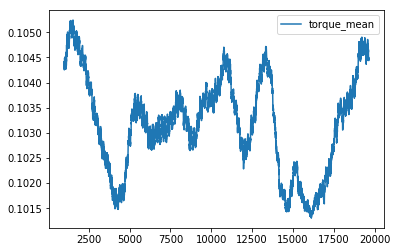

In [24]:
df_all.plot(y='torque_mean')

In [51]:
#add column for fluid torque
I = .0085 #kg/m^2
df_all['fluid_torque'] = df_all['ddtheta']*I -df_all['torque'] 

In [22]:
df_all.head()

,torque,theta,dtheta,ddtheta,power,u,uInds,run,fluid_torque
0,0.154538,4.688990,16.394420,23.968450,2.533564,0.685006,1.0,1,0.049194
1,0.125633,4.705385,16.406404,23.968450,2.061193,0.677085,1.0,1,0.078098
2,0.053472,4.721803,16.438362,47.936900,0.878988,0.681375,1.0,1,0.353992
3,0.061200,4.738269,16.497998,46.224867,1.009681,0.640711,1.0,1,0.331711
4,0.136655,4.754808,16.543537,40.881252,2.260764,0.671847,1.0,1,0.210835


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ed642b0>]],
      dtype=object)

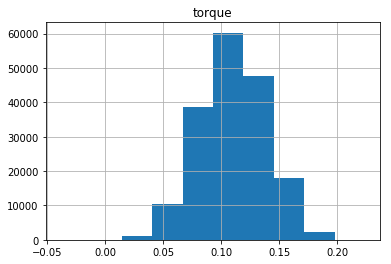

In [28]:
df_all.hist(column='torque')
#distribution of control torque is pretty normal

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1165058d0>]],
      dtype=object)

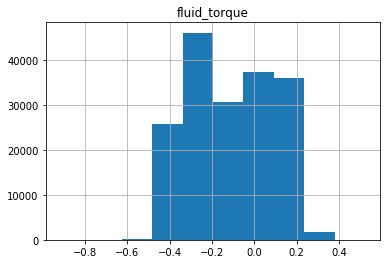

In [30]:
df_all.hist(column = 'fluid_torque')
#distribution of fluid torques is fairly flat

In [31]:
df_all.corr()

,torque,theta,dtheta,ddtheta,power,u,uInds,run,torque_mean,fluid_torque
torque,1.000000,0.011939,0.056708,-0.011370,0.981361,0.002892,-0.005675,-0.061062,0.041810,-0.157387
theta,0.011939,1.000000,0.221149,-0.150027,0.053451,0.037071,0.013692,-0.000745,0.015192,-0.149912
dtheta,0.056708,0.221149,1.000000,0.000173,0.241663,0.016875,-0.097325,-0.087575,0.343534,-0.008118
ddtheta,-0.011370,-0.150027,0.000173,1.000000,-0.011244,-0.006340,-0.025709,0.000088,-0.106545,0.989263
power,0.981361,0.053451,0.241663,-0.011244,1.000000,0.005669,-0.021753,-0.075052,0.111792,-0.154539
u,0.002892,0.037071,0.016875,-0.006340,0.005669,1.000000,-0.015773,0.007006,0.121924,-0.006704
uInds,-0.005675,0.013692,-0.097325,-0.025709,-0.021753,-0.015773,1.000000,0.004505,0.842090,-0.024453
run,-0.061062,-0.000745,-0.087575,0.000088,-0.075052,0.007006,0.004505,1.000000,NaN,0.009012
torque_mean,0.041810,0.015192,0.343534,-0.106545,0.111792,0.121924,0.842090,NaN,1.000000,-0.110986
fluid_torque,-0.157387,-0.149912,-0.008118,0.989263,-0.154539,-0.006704,-0.024453,0.009012,-0.110986,1.000000


In [48]:
import seaborn as sns

#set seaborn style
sns.set(style="whitegrid", palette="colorblind", color_codes=True, context='talk')

%matplotlib inline

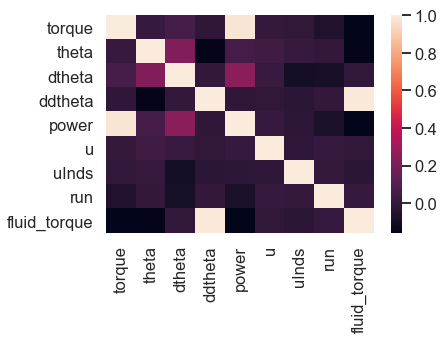

In [23]:
# calculate the correlation matrix
corr = df_all.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

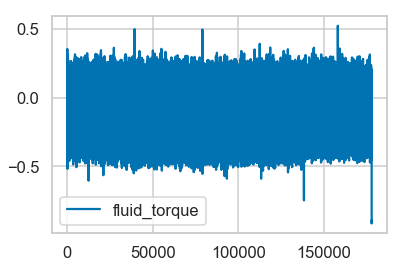

In [50]:
df_all.plot(y='fluid_torque')

/Users/rebeccareitz/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


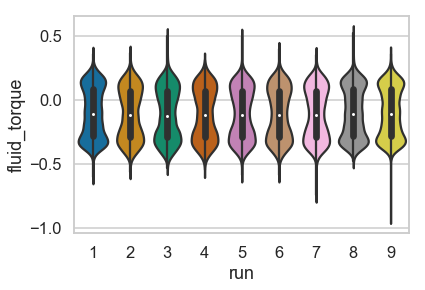

In [51]:
sns.violinplot(x ='run', y='fluid_torque', data = df_all)

/Users/rebeccareitz/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


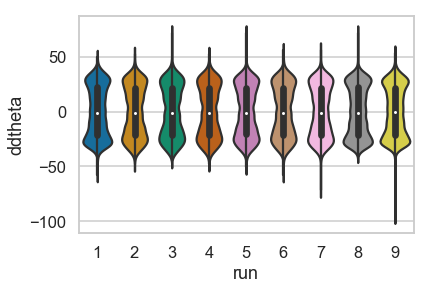

In [54]:
sns.violinplot(x='run', y='ddtheta', data = df_all)

/Users/rebeccareitz/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


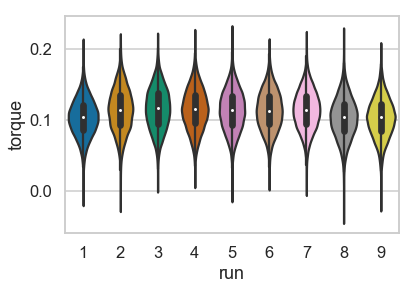

In [52]:
sns.violinplot(x ='run', y='torque', data = df_all)

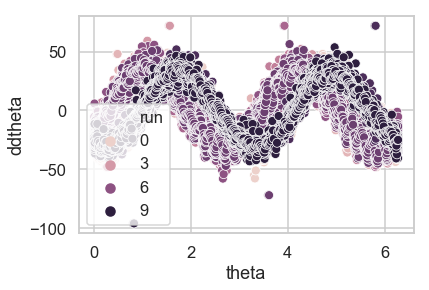

In [53]:
sns.scatterplot(x='theta', y='ddtheta', hue = 'run', data=df_all)

## Baseline Model

The only thing that is important to knowing the fluid torque is ddtheta and the only thing that is important to ddtheta is the current theta, although there appears to be a small phase shift between different runs. So we should be able to brute force this by predicting theta 1,000 steps from now from curent theta, ddtheta from that theta, and tf from ddtheta.

In [52]:
#ddtheta appears to be proportionate to the sin(theta)^2, so make a column for that
df_all['sin_theta_sq'] = df_all['theta'].apply(lambda a: sin(a)**2)

In [53]:
#need to make a lagging version of the fluid-torque
#to predict the torque one second ahead of time
df_all['torque_f_shift']=df_all.groupby(['run'])['fluid_torque'].shift(-1000)

In [54]:
df_all.head()

,torque,theta,dtheta,ddtheta,power,u,uInds,run,fluid_torque,sin_theta_sq,torque_f_shift
0,0.154538,4.688990,16.394420,23.968450,2.533564,0.685006,1.0,1,0.049194,0.999453,-0.358534
1,0.125633,4.705385,16.406404,23.968450,2.061193,0.677085,1.0,1,0.078098,0.999951,-0.366273
2,0.053472,4.721803,16.438362,47.936900,0.878988,0.681375,1.0,1,0.353992,0.999911,-0.388136
3,0.061200,4.738269,16.497998,46.224867,1.009681,0.640711,1.0,1,0.331711,0.999330,-0.377237
4,0.136655,4.754808,16.543537,40.881252,2.260764,0.671847,1.0,1,0.210835,0.998202,-0.343559


In [55]:
df_all.shape

(178001, 11)

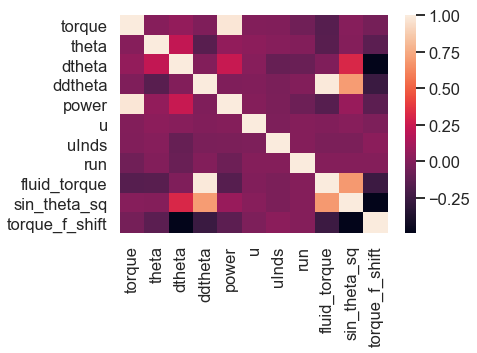

In [56]:
# calculate the correlation matrix
corr = df_all.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

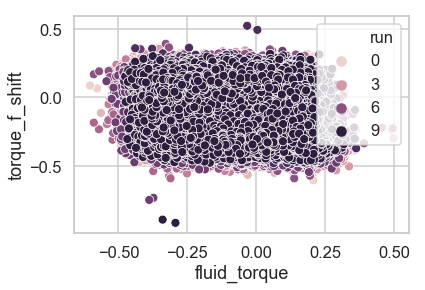

In [57]:
sns.scatterplot(x='fluid_torque', y='torque_f_shift', hue = 'run', data=df_all)
#there's essentially no correlation between the old fluid torque and the new fluid torque

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
df_all = df_all.dropna(subset = ['torque_f_shift'] )

In [60]:
#make a super basic linear regression to get fluid torque from sin_theta_sq
Train_X = df_all.loc[df_all['run']!=9][['sin_theta_sq','theta','dtheta','ddtheta','fluid_torque']]
Train_Y = df_all.loc[df_all['run']!=9]['torque_f_shift']
Test_X = df_all.loc[df_all['run']==9][['sin_theta_sq','theta','dtheta','ddtheta','fluid_torque']]
Test_Y = df_all.loc[df_all['run']==9]['torque_f_shift']

In [61]:
reg = LinearRegression().fit(Train_X,Train_Y)

In [62]:
reg.score(Test_X,Test_Y)
#So this does terribly. More sophisticated models are needed.

-0.13827613176403464

In [63]:
reg.coef_

array([-0.2369281 , -0.00677028, -0.07873552, -0.00130131,  0.14457642])

## Using data with more Variance

The model used above only works at all because the experiments were performed with a constant wind velocity and constant power and the experiments used a two-bladed turbine. If we want to make a model that can adress other geometries we need data that captures more variance.

I went back to the company I was consulting for and asked for data for variable wind speeds to train a more sophisticated model. Below is some initial exploration of that data.

In [2]:
#tds - turbine data statistics

#td - turbine data
#turbPos is theta
#turbVel is dtheta
#turbAac is ddtheta
#power is power
#MZ is control torque (fluid + inirtial)

#fds - fluid data statistics

#fd - fluid data 
#u_inf is upstream velocity, is likely the most useful
#indices uinds are the corresponding indices
#avoid using u in time predictions - it generally won't be collected
#also u_inf may be time shifted from other data, you can find the shift if you need to

In [3]:
cwd = os.getcwd()
data_dir = cwd + '/raw_data/FullControlTests'
os.listdir(data_dir)

['.DS_Store',
 'PwKw2Test10',
 'PwKw2Test8',
 'PwKw2Test6',
 'PwKw2HelicalTest2',
 'PwKw2Test1',
 'PwKw2HelicalTest5',
 'PwKw2HelicalTest4',
 'PwKw2Test7',
 'PwKw2HelicalTest3',
 'PwKw2Test9',
 'PwKw2HelicalTest8',
 'PwKw2Test2',
 'PwKw2HelicalTest6',
 'PwKw2Test5',
 'PwKw2HelicalTest1',
 'PwKw2Test4',
 'PwKw2Test3',
 'PwKw2HelicalTest7']

In [4]:
#The data of interest is embedded a couple layers deep in the data structure given to me
#Many variables are also going by different names than they were in the constant velocity data
#This code should load the data into a form that looks similar to that from the previous data

#turbPos is theta
#turbVel is dtheta
#turbAac is ddtheta
#power is power
#MZ is control torque (fluid + inirtial)

def load_all_tests(directory, max_test):
    for i in range(1,max_test+1): #load all runs - one at a time
        with open(data_dir + '/PwKw2Test'+str(i)+'/pointData.txt') as json_data:
            data = json.load(json_data)
        total_groups = len(data['td'])
        for j in range(0,total_groups):
            df = pd.DataFrame.from_dict(data['td'][j], orient = 'columns') #get data from one group in the td structure
            #rename the columns
            df = df[['turbPos','turbVel','turbAcc','power','MZ']].rename({'turbPos':'theta','turbVel':'dtheta','turbAcc':'ddtheta','MZ':'torque_c'}, axis='columns')
            #add columns to specify the run and group
            df['run']=i
            df['group']=j
            if i == 1 and j==0:
                df_all = df
            else:
                df_all = pd.concat([df_all,df],axis=0,ignore_index=True)
    return df_all

In [5]:
df_variable = load_all_tests(data_dir, 10)

In [6]:
df_variable.head()

,theta,dtheta,ddtheta,power,torque_c,run,group
0,3.551118,23.177491,7.190535e+01,4.182459,0.180453,1,0
1,3.574295,23.213444,7.190535e+01,4.043676,0.174195,1,0
2,3.597544,23.231420,1.082711e-09,3.592449,0.154638,1,0
3,3.620746,23.201364,-1.426693e+01,3.001253,0.129357,1,0
4,3.643947,23.179024,-2.002559e+01,3.082763,0.132998,1,0


In [7]:
#add column for fluid torque
I = .0085 #kg/m^2
df_variable['torque_f'] = df_variable['ddtheta']*I -df_variable['torque_c'] 

In [10]:
#ddtheta appeared to be proportionate to the sin(theta)^2, so make a column for that
df_variable['sin_theta_sq'] = df_variable['theta'].apply(lambda a: sin(a)**2)

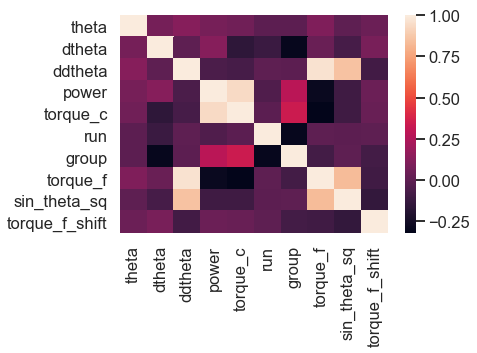

In [14]:
# calculate the correlation matrix
corr = df_variable.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#Fluid torque still has its strongest correlation with ddtheta

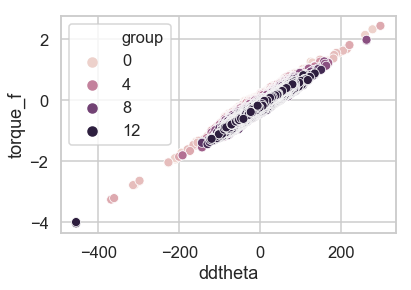

In [11]:
sns.scatterplot(x='ddtheta', y='torque_f', hue = 'group', data=df_variable.loc[df_variable['run']==2])
#there's a very linear-looking relationship between ddtheta and torque_f

/Users/rebeccareitz/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


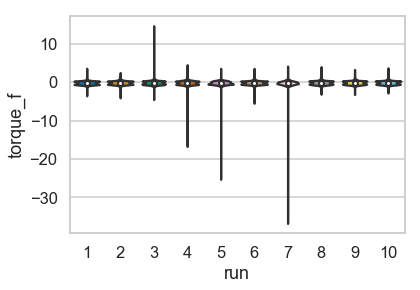

In [14]:
sns.violinplot(x ='run', y='torque_f', data = df_variable)
#There are some really substantial outliers in a few of the runs

In [13]:
#need to make a lagging version of the fluid-torque
#to predict the torque one second ahead of time
#1 second = 1000 rows of data
df_variable['torque_f_shift']=df_variable.groupby(['run'])['torque_f'].shift(-1000)